In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from External.ICT.calculate_ICT import calculate_ICT
from External.clustering import centers
from External.generation import create_graph
from External.plotting import plot_points, plot_graph, no_intersections

plt.style.use('standard.mplstyle')

In [82]:
# Hyperparameters
mode = "K_Nearest"
metric = "euclidean"
dataset = "non_convex"
ICT_algorithm = "exact_own"

In [76]:
a = np.random.random(size=(300,2))
a[:,1] /= 5
b = np.random.random(size=(15,2))
b[:,0] /= 5
b[:,0] += 0.8
b[:,1] /= 20
b[:,1] += 0.2
c = np.random.random(size=(300,2))
c[:,1] /= 5
c[:,1] += 0.25
d = np.random.random(size=(15,2))
d[:,0] /= 5
d[:,1] /= 20
d[:,1] += 0.45
e = np.random.random(size=(300,2))
e[:,1] /= 5
e[:,1] += 0.5

position = np.append(a, b, axis=0)
for points in [c,d,e]:
    position = np.append(position, points, axis=0)

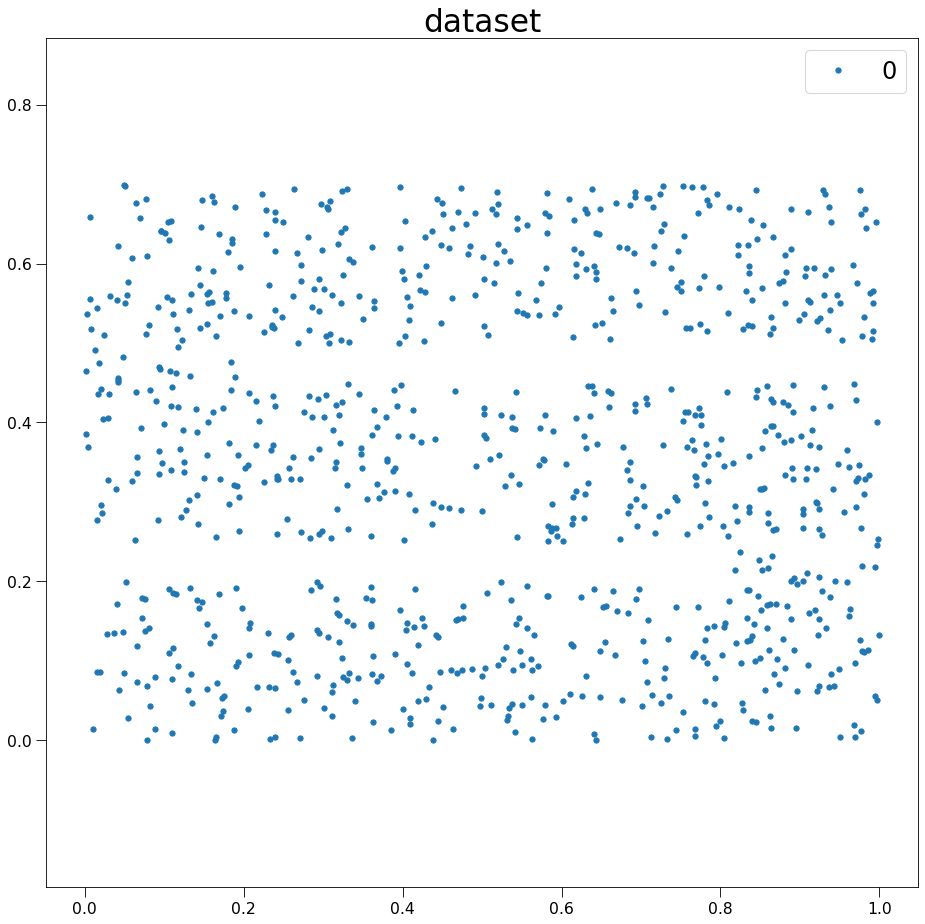

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
plot_points(position, "dataset", ax, node_size=10)

In [78]:
position = StandardScaler().fit_transform(position)
number_of_nodes = len(position)

# Compute knearest graph
cluster_centers = centers(position)
G, _ = create_graph(number_of_nodes, mode, position=position, beta=2, delta=0.5)
G.indexEdges()

ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1)
ICT.indexEdges()

Final k: 11


create edgeId array:   0%|          | 0/5877 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/5877 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/929 [00:00<?, ?it/s]

Final k: 11


calculating the densities for the density criterion:   0%|          | 0/930 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/5877 [00:00<?, ?it/s]

create edgeId array:   0%|          | 0/5877 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/5877 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/929 [00:00<?, ?it/s]

Final k: 11


calculating the densities for the density criterion:   0%|          | 0/930 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/5877 [00:00<?, ?it/s]

create edgeId array:   0%|          | 0/5877 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/5877 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/929 [00:00<?, ?it/s]

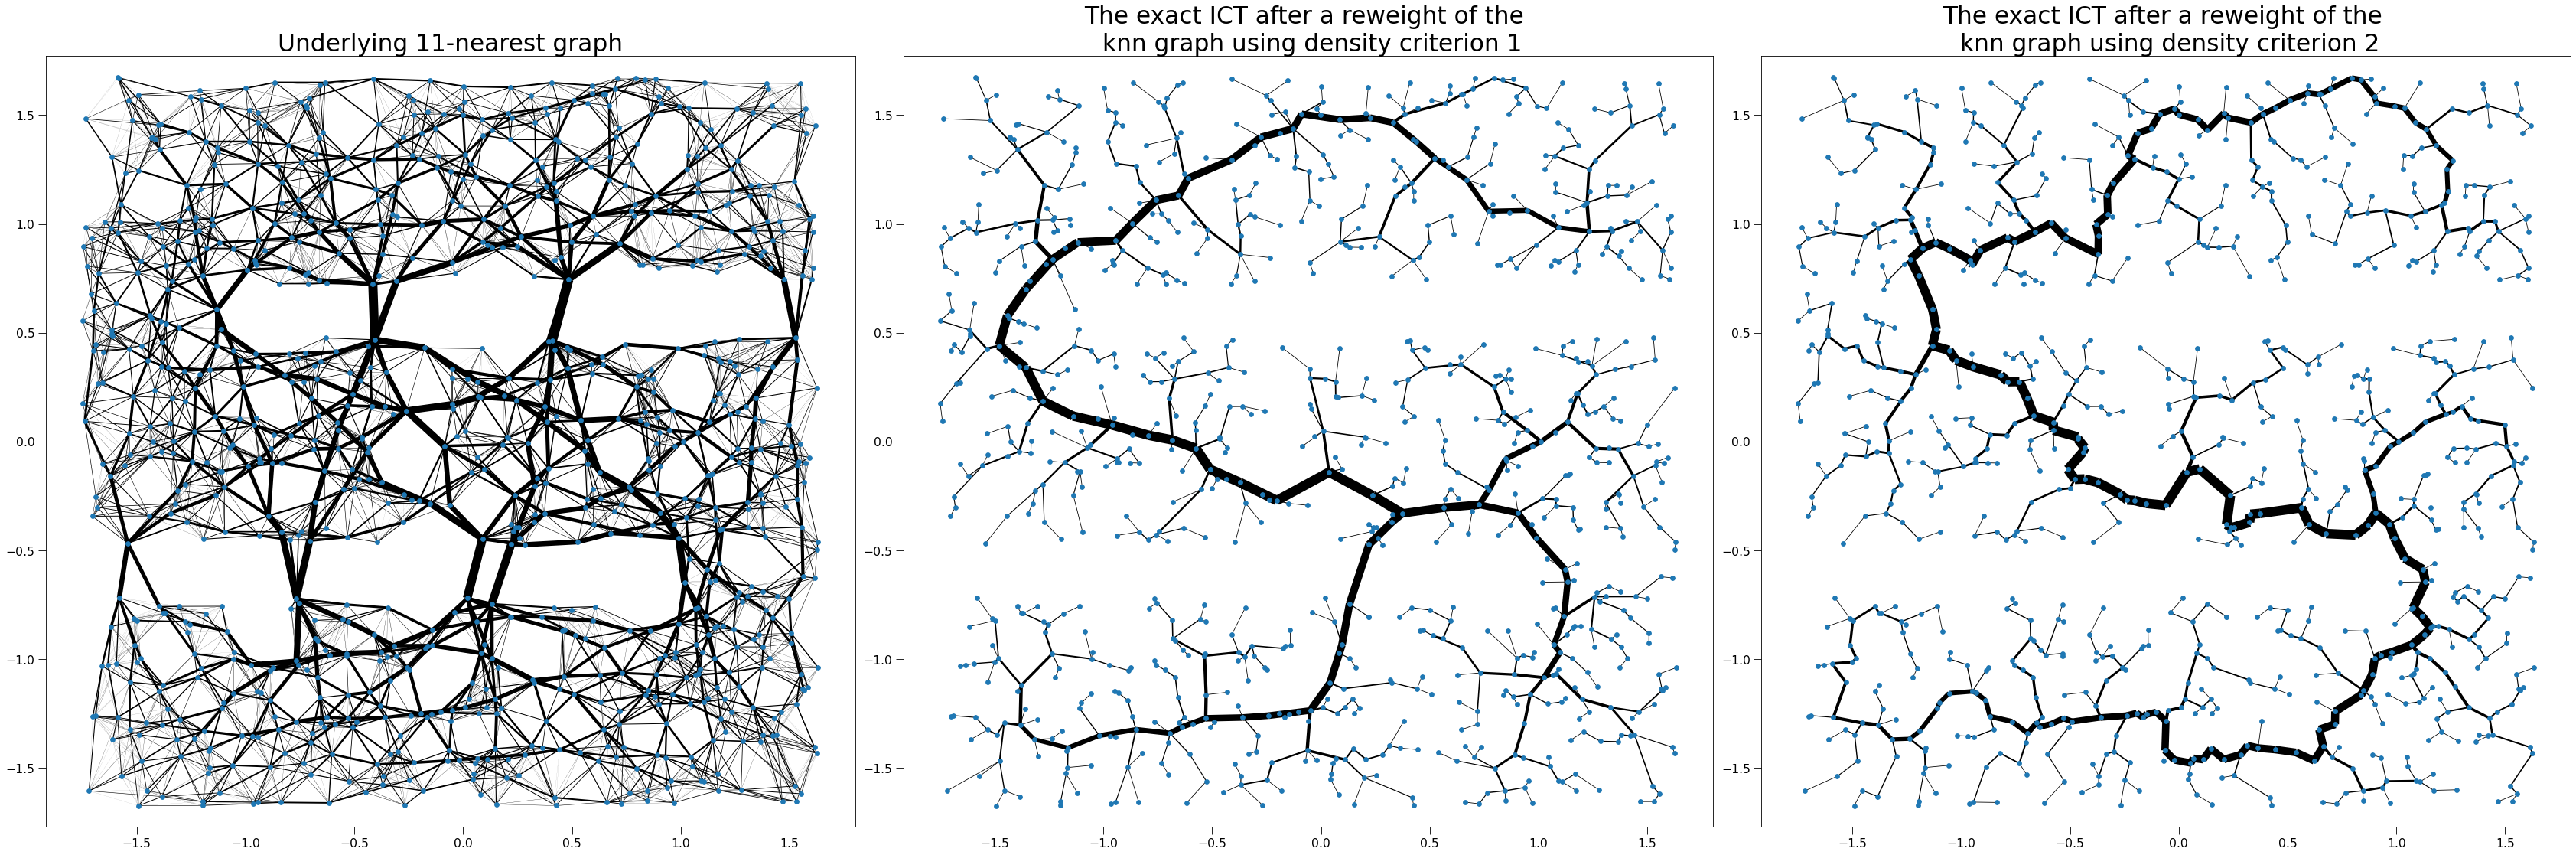

In [86]:
# ICT 1
G1, _ = create_graph(number_of_nodes, mode="K_Nearest+Density", position=position, beta=1.25, delta=1)
G1.indexEdges()

ICT_1 = calculate_ICT(G1, algorithm_type=ICT_algorithm, zeros_stay_zeros=True, update_G=1.1)
ICT_1.indexEdges()

# ICT 2
G2, _ = create_graph(number_of_nodes, mode="K_Nearest+Density2", position=position, beta=2, delta=0.5)
G2.indexEdges()

ICT_2 = calculate_ICT(G2, algorithm_type=ICT_algorithm, zeros_stay_zeros=True, update_G=1.1)
ICT_2.indexEdges()


# Plot the prepared data
fig, axs = plt.subplots(1, 3, figsize=(45,15))
plot_graph(G, position, "Underlying 11-nearest graph", axs[0], node_size=30)
plot_graph(ICT_1, position, "The exact ICT after a reweight of the \n knn graph using density criterion 1", axs[1], node_size=30)
plot_graph(ICT_2, position, "The exact ICT after a reweight of the \n knn graph using density criterion 2", axs[2], node_size=30)


plt.tight_layout()
plt.savefig("./Output/Serpentines.png")

plt.show()